# Pymaceuticals Inc.
---

### Analysis

- I decided to add a few more Drug Regimens to the box plot. It definetly gave more insight. 

 - First, the one and only outlier listed for this subset looks like it may be an incorrect data point, given that no other regimens have outliers. And looking at the origal data, the tumor volume declined and the mouse only lived to 5 months with no metastatic sites. I would take out this mouse (c326), similar to how g989 was expunged.
 - Second, I would say that Capomulin and Ramicane were more effective in keeping down the tumor volume than the other 6 regimens looked at.
 - Third, I would say that the other regimens were even ineffective since their boxplots closely resemeble that of the placebo. This is based on their effects on the volume size of the tumors, and not looking at lifespans which may yield different results.
 
 - AMP

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [8]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [9]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [7]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
study_results.Timepoint.value_counts()
# looks like the number of mice decreases: 
# mice that are still alive at # of months (timepoints) have data points

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [16]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice.
len(mouse_metadata)

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(20)
# we know that one mouse with duplicate timepoints, indicate duplicate data points to a singular mouse

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]
# confirmation of duplicate info assigned to singulary mouse, g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_backup = df.copy()

df = df.loc[df["Mouse ID"] != "g989"].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [20]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [24]:
df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

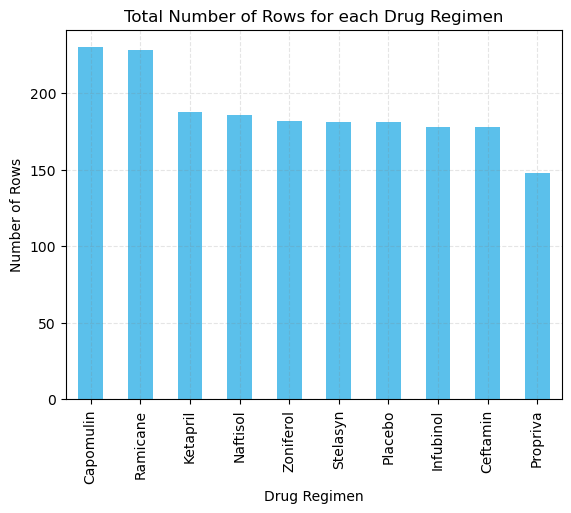

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = df["Drug Regimen"].value_counts()

data.plot(kind="bar", title="Total Number of Rows for each Drug Regimen", color="#5BC0EB")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.grid(axis="both", color="grey", alpha=0.2, linestyle="--")
plt.show()

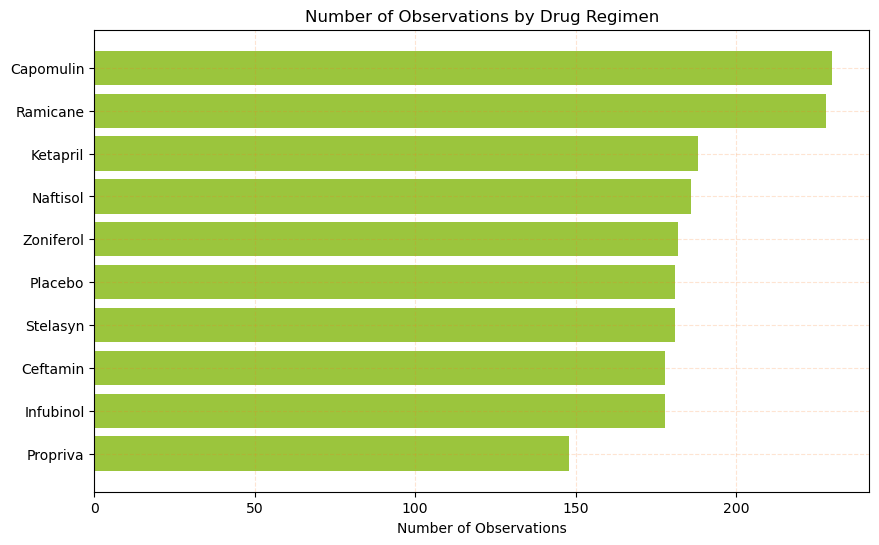

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = data.sort_values().reset_index()
data.columns = ["Drug Regimen", "Number of Rows"]


plt.figure(figsize=(10,6))
plt.barh(data["Drug Regimen"], data["Number of Rows"], color="#9BC53D")
plt.xlabel("Number of Observations")
plt.title("Number of Observations by Drug Regimen")

plt.grid(axis="both", color="#FA7921", alpha=0.2, linestyle="--")

plt.show()

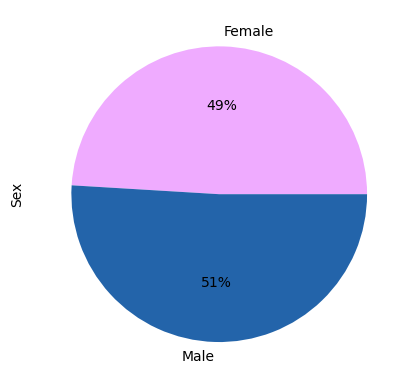

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_colors = ["#EFABFF","#2364AA"]
df.groupby("Sex").size().plot(kind="pie",autopct='%1.0f%%',ylabel = "Sex", colors = sex_colors)


plt.show()

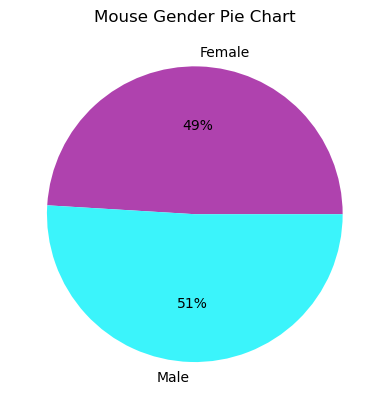

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = df.groupby("Sex").size().values
labels = ["Female", "Male"]
sex_colors = ["#AF42AE","#3BF4FB"]
plt.pie(values, labels=labels,autopct='%1.f%%', colors = sex_colors)
plt.title("Mouse Gender Pie Chart")

plt.show()

In [97]:
df.groupby("Sex").size()

Sex
Female    922
Male      958
dtype: int64

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = df.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_time 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [99]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(max_time, df, on=["Mouse ID", "Timepoint"], how="inner")
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [181]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin","Placebo","Propriva", "Stelasyn", "Zoniferol"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_df.loc[last_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Outlier is the mouse with tumor volume 36.321346, taking Infubinol

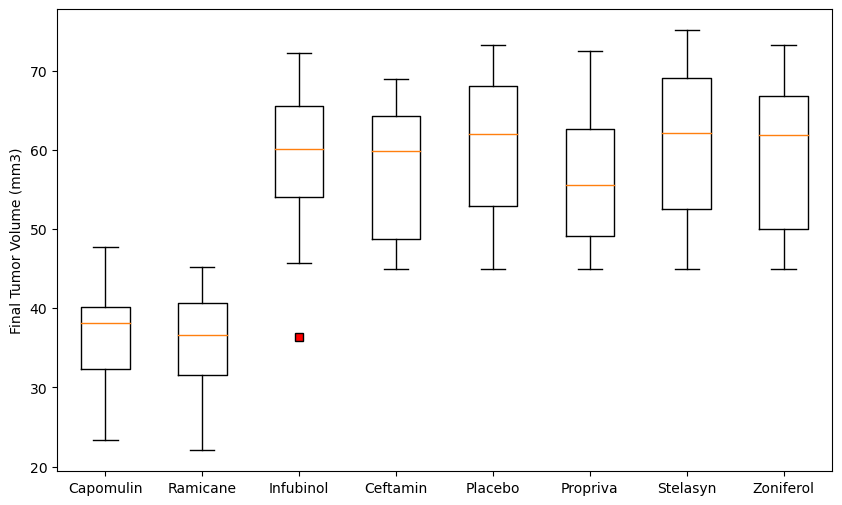

In [183]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops = dict(marker = "s", markerfacecolor = "red"))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

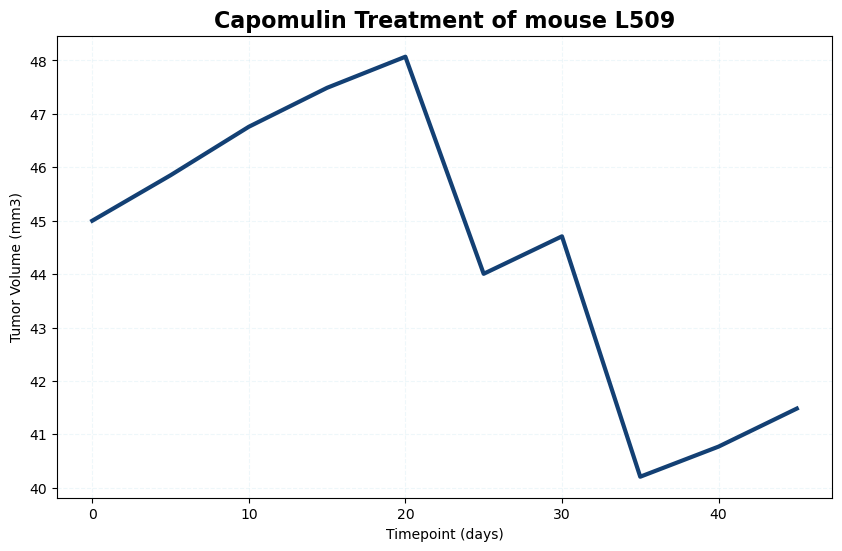

In [125]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_sub = df.loc[df["Mouse ID"] == "l509"] 

plt.figure(figsize=(10,6))
plt.plot(df_sub.Timepoint, df_sub["Tumor Volume (mm3)"], color="#134074", linewidth=3)
plt.title("Capomulin Treatment of mouse L509", fontweight = "bold", fontsize = "16")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="both", color="lightblue", alpha=0.2, linestyle="--")
plt.show()

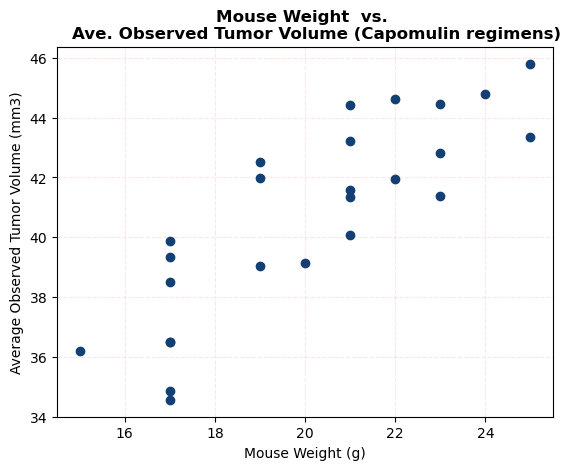

In [139]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

plt.scatter(data["Average Weight"], data["Average Tumor Size"],color="#134074")
plt.title("""Mouse Weight  vs. 
    Ave. Observed Tumor Volume (Capomulin regimens)""", fontweight = "bold")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
plt.grid(axis="both", color="red", alpha=0.1, linestyle="--")
plt.show()

In [142]:
corrs = data.corr()
corrs

,Average Weight,Average Tumor Size
Average Weight,1.000000,0.841936
Average Tumor Size,0.841936,1.000000


## Correlation and Regression

In [144]:
corrs = data.corr()
corrs

,Average Weight,Average Tumor Size
Average Weight,1.000000,0.841936
Average Tumor Size,0.841936,1.000000


In [171]:
corr_coef = data['Average Weight'].corr(data['Average Tumor Size'])
#print(data['Average Weight'].corr(data['Average Tumor Size']))
corr_coef.round(2)

0.84

The correlation between mouse weight and the average tumor volume is 0.84


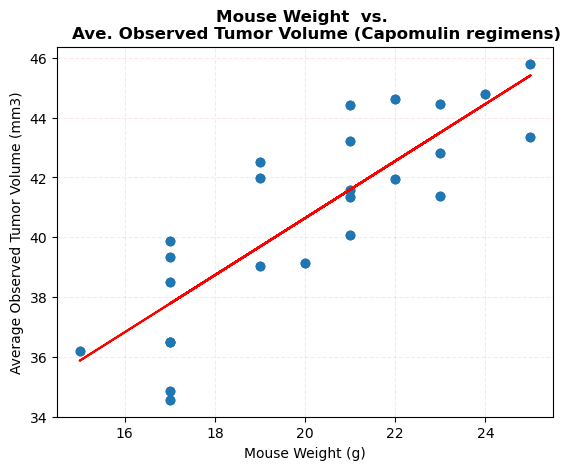

In [174]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
data = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()
data.columns = ["Mouse ID", "Average Weight", "Average Tumor Size"]

plt.scatter(data["Average Weight"], data["Average Tumor Size"],color="#134074")
plt.title("""Mouse Weight  vs. 
    Ave. Observed Tumor Volume (Capomulin regimens)""", fontweight = "bold")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
plt.grid(axis="both", color="red", alpha=0.1, linestyle="--")

# fit a linear regression line to the data
m, c = np.polyfit(data["Average Weight"], data["Average Tumor Size"], 1)
regression_line = ( m * data ["Average Weight"] ) + c

plt.scatter(data["Average Weight"], data["Average Tumor Size"])
plt.plot(data["Average Weight"], regression_line, color='red')
print(f"The correlation between mouse weight and the average tumor volume is {corr_coef.round(2)}")
plt.show()